# Assignment 8: Implement a Neural Network for Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # Suppresses info and warning messages.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

In this assignment, you will implement a feedforward neural network that performs sentiment classification.
You will complete the following tasks:
    
1. Build your DataFrame and define your ML problem:
    * Load the book review data set
    * Define the label - what are you predicting?
    * Identify the features
2. Create labeled examples from the data set
3. Split the data into training and test data sets
4. Transform the training and test text data using a TF-IDF vectorizer. 
5. Construct a neural network
6. Train the neural network
7. Compare the neural network model's performance on the training and validation data.
8. Improve the model's generalization performance.
9. Evaluate the model's performance on the test data.
10. Experiment with ways to improve the model.

For this assignment, use the demo <i>Transforming Text into Features for Sentiment Analysis</i> that is contained in this unit as a reference.

**<font color='red'>Note: some of the code cells in this notebook may take a while to run</font>**

## Part 1. Build Your DataFrame and Define Your ML Problem


#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the book review data set that contains book reviews taken from Amazon.com reviews.

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "bookReviews.csv" that is located in a folder named "data_NLP".

In [2]:
# Loads the data using pd.read_csv and saves it to DataFrame df using the file "bookReviews.csv" and folder "data_NLP."
filename = os.path.join(os.getcwd(), "data_NLP", "bookReviews.csv")
df = pd.read_csv(filename, header = 0)

#### Inspect the Data

<b>Task</b>: In the code cell below, inspect the data in DataFrame `df` by printing the number of rows and columns, the column names, and the first ten rows. You may perform any other techniques you'd like to inspect the data.

In [3]:
# Prints the number of rows and columns.
print("Number of rows:")
print(df.shape[0])
print("Number of columns:")
print(df.shape[1])

Number of rows:
1973
Number of columns:
2


In [4]:
# Prints the column names.
print("Column names:")
print(list(df.columns))

Column names:
['Review', 'Positive Review']


In [5]:
# Prints the first ten rows.
print("First ten rows:")
print(df.head(10))

First ten rows:
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
5  I don't know why it won the National Book Awar...            False
6  The daughter of a prominent Boston doctor is d...            False
7  I was very disapointed in the book.Basicly the...            False
8  I think in retrospect I wasted my time on this...            False
9  I have a hard time understanding what it is th...            False


#### Define the Label

This is a binary classification problem in which we will predict whether a book review is a positive or negative one. The label is the `Positive Review` column.

#### Identify Features

We only have one feature. The feature is the `Review` column.


## Part 2. Create Labeled Examples from the Data Set 

<b>Task</b>: In the code cell below, create labeled examples from DataFrame `df`. Assign the label to the variable `y`. Assign the feature to the variable `X`. 

In [6]:
# Assuming the column names are "Review" for features and "Positive Review" for labels...
X = df['Review'] 
y = df['Positive Review']

## Part 3. Create Training and Test Data Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. Create a test set that is 25 percent of the size of the data set. Save the results to variables `X_train, X_test, y_train, y_test`.


In [7]:
# Splits the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Part 4:  Implement TF-IDF Vectorizer to Transform Text


In the code cell below, you will transform the features into numerical vectors using `TfidfVectorizer`. 


<b>Task:</b> Follow the steps to complete the code in the cell below:

1. Create a `TfidfVectorizer` object and save it to the variable `tfidf_vectorizer`.

2. Call `tfidf_vectorizer.fit()` to fit the vectorizer to the training data `X_train`.

3. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the training data `X_train`. Save the result to `X_train_tfidf`.

4. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the test data `X_test`. Save the result to `X_test_tfidf`.

In [8]:
# 1. Creates a TfidfVectorizer object.
tfidf_vectorizer = TfidfVectorizer()

# 2. Fits the vectorizer to X_train.
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transforms the training data.
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transforms the test data.
X_test_tfidf = tfidf_vectorizer.transform(X_test)

When constructing our neural network, we will have to specify the `input_shape`, meaning the dimensionality of the input layer. This corresponds to the dimension of each of the training examples, which in our case is our vocabulary size. Run the code cell below to see the vocabulary size.


In [9]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

18814


## Part 5: Construct a Neural Network


### Step 1.  Define Model Structure

Next we will create our neural network structure. We will create an input layer, three hidden layers and an output layer:

* <b>Input layer</b>: The input layer will have the input shape corresponding to the vocabulary size. 
* <b>Hidden layers</b>: We will create three hidden layers, with 64, 32, and 16 units (number of nodes) respectively. Each layer will utilize the ReLU activation function. 
* <b>Output layer</b>: The output layer will have 1 unit. The output layer will utilize the sigmoid activation function. Since we are working with binary classification, we will be using the sigmoid activation function to map the output to a probability between 0.0 and 1.0. We can later set a threshold and assume that the prediction is class 1 if the probability is larger than or equal to our threshold, or class 0 if it is lower than our threshold.

Use the same approach you have taken in this course to construct a feedforward neural network model using Keras. Do the following:

* Use the Keras [`Sequential` class](https://keras.io/api/models/sequential/#sequential-class) to group a stack of layers. This will be our neural network model object. Name your neural network model object ```nn_model```.    
* Use the [`InputLayer` class](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer) to create the input layer. 
* Use the [`Dense` class](https://keras.io/api/layers/core_layers/dense/) to create each hidden layer and the output layer.
* After creating each layer, add it to the neural network model object ```nn_model```.


In [10]:
# 1. Creates a model object.
nn_model = keras.Sequential()

# 2. Creates the input layer and add it to the model object.
nn_model.add(keras.layers.InputLayer(input_shape=(vocabulary_size,)))

# 3. Creates the first hidden layer and add it to the model object.
nn_model.add(keras.layers.Dense(64, activation='relu'))

# 4. Creates the second hidden layer and add it to the model object.
nn_model.add(keras.layers.Dense(32, activation='relu'))

# 5. Creates the third hidden layer and add it to the model object.
nn_model.add(keras.layers.Dense(16, activation='relu'))

# 6. Creates the output layer and add it to the model object.
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))

# Prints the summary of neural network model structure.
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1204160   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,206,785
Trainable params: 1,206,785
Non-trainable params: 0
_________________________________________________________________


2024-07-22 21:56:38.059823: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Step 2. Define the Optimization Function

<b>Task:</b> In the code cell below, create a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`. Specify a learning rate of 0.1. Assign the result to the variable`sgd_optimizer`.

In [11]:
# Creates a SGD optimizer with learning rate of 0.1.
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

### Step 3. Define the Loss Function

<b>Task:</b> In the code cell below, create a binary cross entropy loss function using `keras.losses.BinaryCrossentropy()`. Since our output will be a normalized probability between 0 and 1, specify that `from_logits` is `False`. Assign the result to the variable  `loss_fn`.

In [12]:
# Creates a binary cross-entropy loss function.
loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)

### Step 4. Compile the Model

<b>Task:</b> In the code cell below, package the network architecture with the optimizer and the loss function using the `nn_model.compile()` method. Specify the optimizer, loss function and the accuracy evaluation metric as arguments.

In [13]:
# Compiles the model.
nn_model.compile(optimizer = sgd_optimizer, loss = loss_fn, metrics = ['accuracy'])

# Prints a summary of the compiled model.
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1204160   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,206,785
Trainable params: 1,206,785
Non-trainable params: 0
_________________________________________________________________


## Part 6. Fit the Model on the Training Data

We will define our own callback class to output information from our model while it is training. Make sure you execute the code cell below so that it can be used in subsequent cells.

In [14]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs = None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

<b>Task:</b> In the code cell below, fit the neural network model to the vectorized training data. Call the `fit()` method on the model object `nn_model` and specify the following arguments:

1. The training data `X_train_tfidf` and `y_train` as arguments. Note that `X_train_tfidf` is currently of type sparce matrix. The Keras `fit()` method requires that input data be of specific types. One type that is allowed is a NumPy array. Convert `X_train_tfidf` to a NumPy array using the `toarray()` method.
2. Use the `epochs` parameter and assign it the number of epochs.
3. Use the `verbose` parameter and assign it the value of  0.
4. We will use a portion of our training data to serve as validation data. Use the  `validation_split` parameter and assign it the value `0.2`
5. Use the `callbacks` parameter and assign it a list containing our logger function: 
    `callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]`  


Save the results to the variable `history`.
  
<b>Note</b>: This may take a while to run.

In [15]:
t0 = time.time() # start time

num_epochs = 55 # epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs = num_epochs, verbose = 0, validation_split = 0.2, callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n = 5)])

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 55], Loss: 0.6897, Accuracy: 0.5714, Val_loss: 0.6900, Val_accuracy: 0.5068
Epoch [10/ 55], Loss: 0.6599, Accuracy: 0.7270, Val_loss: 0.6661, Val_accuracy: 0.7297
Epoch [15/ 55], Loss: 0.5260, Accuracy: 0.7337, Val_loss: 0.5532, Val_accuracy: 0.6892
Epoch [20/ 55], Loss: 0.4030, Accuracy: 0.8199, Val_loss: 0.4639, Val_accuracy: 0.7635
Epoch [25/ 55], Loss: 0.3673, Accuracy: 0.8352, Val_loss: 1.1986, Val_accuracy: 0.5304
Epoch [30/ 55], Loss: 0.0395, Accuracy: 0.9975, Val_loss: 0.4812, Val_accuracy: 0.7973
Epoch [35/ 55], Loss: 0.0078, Accuracy: 1.0000, Val_loss: 0.5448, Val_accuracy: 0.7804
Epoch [40/ 55], Loss: 0.0036, Accuracy: 1.0000, Val_loss: 0.5474, Val_accuracy: 0.7804
Epoch [45/ 55], Loss: 0.0022, Accuracy: 1.0000, Val_loss: 0.5669, Val_accuracy: 0.7838
Epoch [50/ 55], Loss: 0.0016, Accuracy: 1.0000, Val_loss: 0.5921, Val_accuracy: 0.7804
Epoch [55/ 55], Loss: 0.0012, Accuracy: 1.0000, Val_loss: 0.6139, Val_accuracy: 0.7804
Elapsed time: 5.55s


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualize the Model's Performance Over Time

The code below outputs both the training loss and accuracy and the validation loss and accuracy. Let us visualize the model's performance over time:

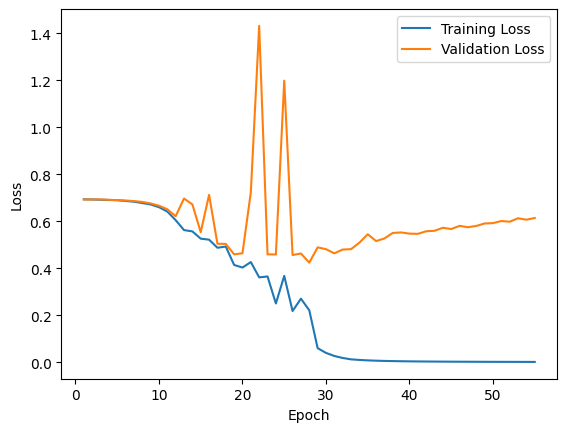

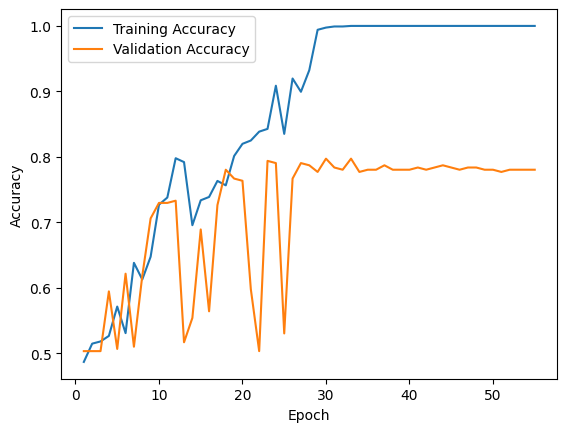

In [17]:
# Plots the training and validation loss.
plt.plot(range(1, num_epochs + 1), history.history['loss'], label = 'Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label = 'Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plots the training and validation accuracy.
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label = 'Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 7. Evaluate the Model's Performance

### Improve Model's Performance and Prevent Overfitting 

Neural networks can be prone to overfitting. Notice that the training accuracy is 100% but the validation accuracy is around 80%. This indicates that our model is overfitting; it will not perform as well on new, previously unseen data as it did during training. We want to have an accurate idea of how well our model will generalize to new data. Our goal is to have our training and validation accuracy scores be as close as possible.

While there are different techniques that can be used to prevent overfitting, for the purpose of this exercise we will focus on two methods:

1. Changing the number of epochs. Too many epochs can lead to overfitting of the training dataset, whereas too few epochs may result in underfitting.

2. Adding dropout regularization. During training, the nodes of a particular layer may always become influenced only by the output of a particular node in the previous layer, causing overfitting. Dropout regularization is a technique that randomly drops a number of nodes in a neural network during training as a way of adding randomization and preventing nodes from becoming dependent on one another. Adding dropout regularization can reduce overfitting and also improve the performance of the model. 

<b>Task:</b> 

1. Tweak the variable `num_epochs` above and restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the validation data.

2. Add Keras `Dropout` layers after one or all hidden layers. Add the following line of code after you add a hidden layer to your model object:  `nn_model.add(keras.layers.Dropout(.25))`. The parameter `.25` is the fraction of the nodes to drop. You can experiment with this value as well. Restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the validation data.


<b>Analysis:</b> 
In the cell below, specify the different approaches you used to reduce overfitting and summarize which configuration led to the best generalization performance.

Did changing the number of epochs prevent overfitting? Which value of `num_epochs` yielded the closest training and validation accuracy score? 

Did adding dropout layers prevent overfitting? How so? Did it also improve the accuracy score when evaluating the validation data? How many dropout layers did you add and which fraction of nodes did you drop? 

Record your findings in the cell below.

Based on all of the information below, we can conclude several things:

Changing num_epochs - Elapsed time is larger when num_epochs is increased and smaller when num_epochs is decreased.
- There is a slight increase in accuracy when the number of epochs is increased, but I do not think it is enough to significantly prevent overfitting. In fact, having so many epochs can contribute to overfitting rather than prevent it.
- When the epochs were 60, 70, and 80, the closest training and validation scores were 1.0000 and 0.8345, respectively.

Changing dropout layers - Elapsed time is slightly higher for all instances.
- Adding dropout layers seemed to significantly prevent overfitting. This is not only illustrated in the above graphs (when the information is manipulated, of course) but the closest training and validation scores were 0.8893 and 0.8243, respectively. This occurred when there were 3 dropout layers with .50 as the fraction of the nodes to drop.
_____________________________________________________________________________________________________________________________________

No changes - 
Elapsed time: 4.77s
- Training accuracy: 1.0000
- Highest validation accuracy: 0.8311
- Epoch(s): 55/55

Increasing the num_epochs to 555 from 55 - 
Elapsed time: 45.39s
- Training accuracy: 1.0000
- Highest validation accuracy: 0.8345
- Epoch(s): 60, 70, 80

Decreasing the num_epochs to 5 from 55 - 
Elapsed time: 0.73s
- Training accuracy: 1.0000
- Highest validation accuracy: 0.8311
- Epoch(s): 5/5

Adding 3 dropout layers with .25 as the fraction of the nodes to drop -
Elapsed time: 5.78s
- Training accuracy: 0.9924
- Highest validation accuracy: 0.8108
- Epoch(s): 55

Adding 3 dropout layers with .50 as the fraction of the nodes to drop -
Elapsed time: 5.61s
- Training accuracy: 0.8893
- Highest validation accuracy: 0.8243
- Epoch(s): 55 

Decreased the dropout layers to 1 with .50 as the fraction of nodes to drop -
Elapsed time: 5.42s
- Training accuracy: 0.9087
- Highest validation accuracy: 0.8209
- Epoch(s): 30

### Evaluate the Performance on the Test Set

Now that you have improved the model, let's evaluate its performance on our test data and compare the results.

<b>Task:</b> In the code cell below, call the  `evaluate()` method on the model object `nn_model`. Specify `X_test_tfidf` and `y_test` as arguments. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. 

Note: The `evaluate()` method returns a list containing two values. The first value is the loss and the second value is the accuracy score.


In [18]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.8198
Loss:  0.5132052302360535 Accuracy:  0.8198380470275879


### Make Predictions on the Test Set

Now that we have our best performing model that can generalize to new, previously unseen data, let us make predictions using our test data.

In the cell below, we will make a prediction on our test set and receive probability predictions for every example in the test set (these values will be between 0.0 and 1.0). We will then inspect the results for the first 20 examples &mdash; We will apply a threshold to determine the predicted class for every example; we will use a threshold of 0.5. This means that if the probability is greater than 0.5, we will assume the book review is good. We will then print the actual class labels contained in `y_test` to see if our model is producing accurate predictions.

<b>Task: </b> In the code cell below, do the following:

1. Call the  `predict()` method on the model object `nn_model`. Specify `X_test_tfidf` as an argument. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. Save the results to the array `probability_predictions`.
2. Loop through the first 20 items in `probability_predictions`. These correspond to the predicted probabilities for the first 20 examples in our test set. For every item, check if the probability is greater than 0.5. If so, output:
* the probability value in `probability_predictions`
* the corresponding label in `y_test`. Note: convert the series `y_test` using `y_test.to_numpy()` before indexing into it.

Inspect the results. How is our model performing? Is our model properly predicting whether the book reviews are good or bad reviews?

In [19]:
# Makes predictions on the test set.
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

# Loops through the first 20 items in probability_predictions.
for i in range(20):
    probability = probability_predictions[i]
    predicted_class = 1 if probability > 0.5 else 0 
    actual_label = y_test.to_numpy()[i]
    
    if predicted_class == 1:
        print(f"Example {i+1}:")
        print(f"Probability: {probability}")
        print(f"Actual Label: {actual_label}\n")

Example 2:
Probability: [0.99786294]
Actual Label: True

Example 3:
Probability: [0.99981076]
Actual Label: True

Example 4:
Probability: [0.595986]
Actual Label: True

Example 5:
Probability: [0.99884707]
Actual Label: True

Example 6:
Probability: [0.99770594]
Actual Label: True

Example 7:
Probability: [0.87995595]
Actual Label: True

Example 8:
Probability: [0.9976115]
Actual Label: True

Example 9:
Probability: [0.99984586]
Actual Label: True

Example 10:
Probability: [0.9998177]
Actual Label: True

Example 14:
Probability: [0.9999377]
Actual Label: True

Example 15:
Probability: [0.9177938]
Actual Label: True

Example 16:
Probability: [0.99964]
Actual Label: True

Example 17:
Probability: [0.9761119]
Actual Label: False



Let's check a few of the original book review texts to get a further glimpse into how our model is performing.

In [20]:
print('Review #1:\n')

print(X_test.to_numpy()[11])

goodReview = True if probability_predictions[11] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))

Review #1:

I love fairy tales!  I was so excited to see the author of Beauty had another retelling.  Spindles End has me very confused.  I am plugging through it and hope when I am done with it a second time I can give it more stars.  I would not recommend it for younger readers


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [21]:
print('Review #2:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

Normally I like the entire "female power" thing but frankly the "this is wrong" or "evil" part of that storyline is really old.  In an era where girls do try out for and get placed on "boys" teams, these issues seem outdated.  Likewise rules were recently changed in Indiana (not even slightly a liberal state) that says any pageant receiving state funds cannot discriminate on the basis of sex or gender.  I know, this book is from 1999, but we are living in a conservative backlash politically and this is still happening, changes are happening.  Overall I felt the book had a very negative view of the gender roles and did not do anything to suggest they should be different.  Even the disempowered girl who creates the initial problems with her "magic" is empowered through a pageant and her cooking.  How much more gender role enforcement can we have?  Really, with a strong female lead, shouldn't a Buffy universe story do better than this?  In general the feel of the relationships

In [22]:
print('Review #3:\n')

print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #3:

Do you like romance novels? Do you call your dogs your babies? This is the book for you. The thriller aspect of this book is far overshadowed by the romance portion, and the annoyingly repetitious mentioning of the dog could possibly drive most readers over the edge. This was my first Johansen novel, and it most certainly will be my last. Two stars for actually wrapping up the story without leaving too many loose ends. 


Prediction: Is this a good review? True

Actual: Is this a good review? False



In [23]:
print('Review #4:\n')
print(X_test.to_numpy()[102])

goodReview = True if probability_predictions[102] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[102]))

Review #4:

I don't know why it won the National Book Award.  This book is very slow, &amp; very boring.  Where is the action?  I forced myself to finish it


Prediction: Is this a good review? False

Actual: Is this a good review? False



## Part 8: Analysis

Experiment with the vectorizer and neural network implementation above and compare your results every time you train the network. Pay attention to the time it takes to train the network, and the resulting loss and accuracy on both the training and test data. 

Below are some ideas for things you can try:

* Adjust the learning rate.
* Add more hidden layers and/or experiment with different values for the `unit` parameter in the hidden layers to change the number of nodes in the hidden layers.
* Fit your vectorizer using different document frequency values and different n-gram ranges. When creating a `TfidfVectorizer` object, use the parameter `min_df` to specify the minimum 'document frequency' and use `ngram_range=(1,2)` to change the default n-gram range of `(1,1)`.

Record your findings in the cell below.


Based on all of the information below, we can conclude several things:

Learning rate - Elapsed time is smaller when the rate is both increased and decreased.
- Increasing/decreasing the learning rate increases the loss for the training/testing data yet decreases the accuracy.

Changing the 'unit' parameter - Elapsed time is larger when parameters are increased and smaller when parameters are decreased.
- Increasing the 'unit' parameter increases the loss for the training data yet decreases the accuracy.
- Increasing the 'unit' parameter increases the loss for the testing data yet decreases the accuracy.
- Decreasing the 'unit' parameter decreases the loss for the training data and decreases the accuracy.
- Decreasing the 'unit' parameter decreases the loss for the testing data yet increases the accuracy.

Changing min_df - Elapsed time is smaller when min_dif is both 100 and 10.
- Changing min_df = 100 increases the loss for the training/testing data yet decreases the accuracy.
- Changing min_df = 10 increases the loss for the training/testing data yet decreases the accuracy.

Changing ngram_range - Elapsed time is larger when ngram_range is (1,2) instead of (1,1).
- Changing ngram_range to (1,2) increases the loss for the training data yet decreases the accuracy.
- Changing ngram_range to (1,2) decreases the loss for the testing data and decreases the accuracy.
_____________________________________________________________________________________________________________________________________

No changes - 
Elapsed time: 5.38s
- Training data: 0s 1ms/step - loss: 0.0847 - accuracy: 0.9716
- Testing data: 0s 1ms/step - loss: 0.5700 - accuracy: 0.8279

Increasing the learning rate to 1 - 
Elapsed time: 5.08s
- Training data: 0s 1ms/step - loss: 0.6925 - accuracy: 0.5179
- Testing data: 0s 1ms/step - loss: 0.6960 - accuracy: 0.4595

Decreasing the learning rate to 0.01 - 
Elapsed time: 5.11s
- Training data: 0s 1ms/step - loss: 0.6848 - accuracy: 0.6335
- Testing data: 0s 1ms/step - loss: 0.6881 - accuracy: 0.5850

Increasing the 'unit' parameter for hidden_layer_1 to 128, hidden_layer_2 to 64, and hidden_layer_3 to 32 - 
Elapsed time: 7.13s
- Training data: 0s 1ms/step - loss: 0.1140 - accuracy: 0.9696
- Testing data: 0s 1ms/step - loss: 0.6424 - accuracy: 0.8077

Decreasing the 'unit' parameter for hidden_layer_1 to 32, hidden_layer_2 to 16, and hidden_layer_3 to 8 - 
Elapsed time: 4.19s
- Training data: 0s 809us/step - loss: 0.0831 - accuracy: 0.9689
- Testing data: 0s 802us/step - loss: 0.5435 - accuracy: 0.8320

min_df = 100 -
Elapsed time: 2.12s
- Training data: 0s 470us/step - loss: 0.2103 - accuracy: 0.9337
- Testing data: 0s 534us/step - loss: 0.6823 - accuracy: 0.7368

min_df = 10 -
Elapsed time: 2.71s
- Training data: 0s 579us/step - loss: 0.1796 - accuracy: 0.9581
- Testing data: 0s 621us/step - loss: 0.7215 - accuracy: 0.8057

ngram_range = (1,2) -
Elapsed time: 33.08s
- Training data: 0s 5ms/step - loss: 0.0902 - accuracy: 0.9601
- Testing data: 0s 5ms/step - loss: 0.4609 - accuracy: 0.8239